# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

KeyboardInterrupt: 

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [ ]:
corr = app_train.corr()['TARGET']

In [ ]:
corrColumns = app_train.columns[list(app_train.dtypes!='object')]

In [ ]:
new_dict = {k:v for k,v in zip(corrColumns, corr)}

In [ ]:
sorted_list = sorted(new_dict.items(), key=lambda x:x[1])
sorted_list 

In [81]:
sorted_list[:15]

[('EXT_SOURCE_3', -0.17891869762805598),
 ('EXT_SOURCE_2', -0.1604716716054463),
 ('EXT_SOURCE_1', -0.15531712606409276),
 ('DAYS_BIRTH', -0.07823930831003195),
 ('DAYS_EMPLOYED_ANOM', -0.04598707841544573),
 ('FLOORSMAX_AVG', -0.044003370532464434),
 ('FLOORSMAX_MEDI', -0.043767921047647734),
 ('FLOORSMAX_MODE', -0.04322626321389568),
 ('AMT_GOODS_PRICE', -0.039645281169414404),
 ('REGION_POPULATION_RELATIVE', -0.03722714854256482),
 ('ELEVATORS_AVG', -0.034198793675268006),
 ('ELEVATORS_MEDI', -0.033862876768524695),
 ('FLOORSMIN_AVG', -0.03361350325191881),
 ('FLOORSMIN_MEDI', -0.03339428719114784),
 ('LIVINGAREA_AVG', -0.03299711746766171)]

In [91]:
sorted_list[-2:-17:-1]

[('DAYS_EMPLOYED', 0.07495845742555217),
 ('REGION_RATING_CLIENT_W_CITY', 0.060892667564898695),
 ('REGION_RATING_CLIENT', 0.058899014945840766),
 ('DAYS_LAST_PHONE_CHANGE', 0.0552184835135491),
 ('DAYS_ID_PUBLISH', 0.05145717260719229),
 ('REG_CITY_NOT_WORK_CITY', 0.050994464367959576),
 ('FLAG_EMP_PHONE', 0.04598221971656028),
 ('REG_CITY_NOT_LIVE_CITY', 0.04439537480589986),
 ('FLAG_DOCUMENT_3', 0.044346346851488506),
 ('DAYS_REGISTRATION', 0.04197486283152581),
 ('OWN_CAR_AGE', 0.03761156427512843),
 ('LIVE_CITY_NOT_WORK_CITY', 0.03251834110161418),
 ('DEF_30_CNT_SOCIAL_CIRCLE', 0.03224757925295741),
 ('DEF_60_CNT_SOCIAL_CIRCLE', 0.03127647212660722),
 ('FLAG_WORK_PHONE', 0.028524322363399968)]

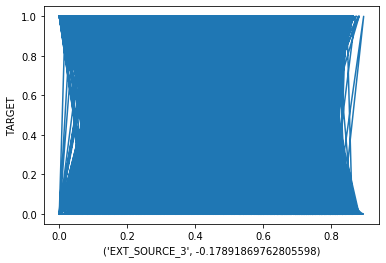

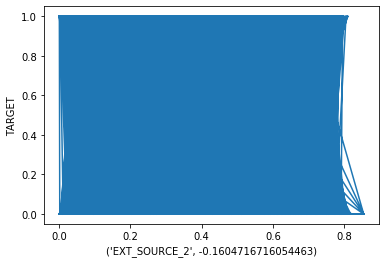

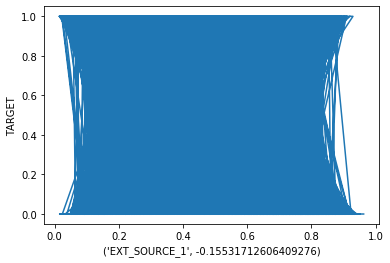

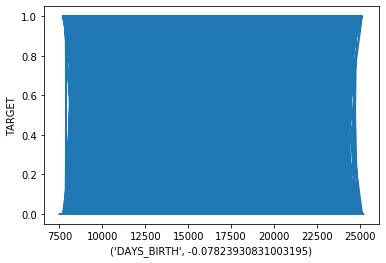

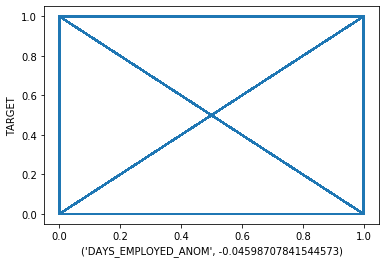

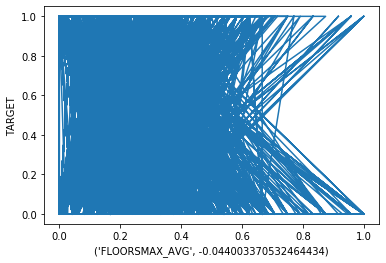

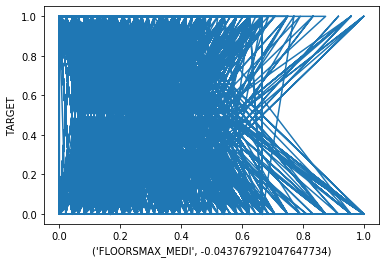

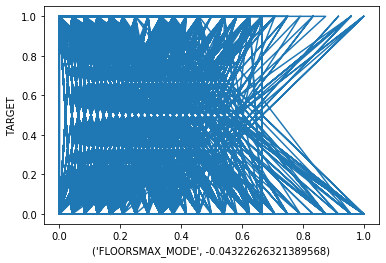

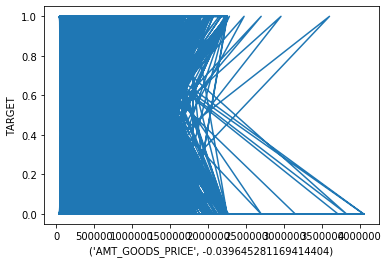

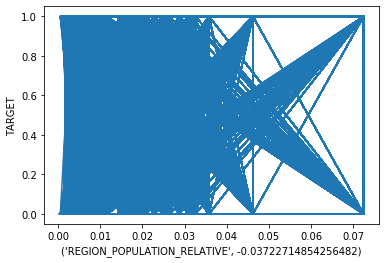

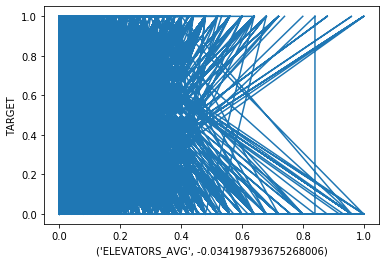

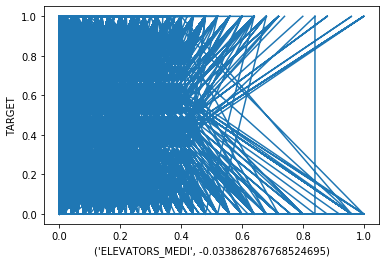

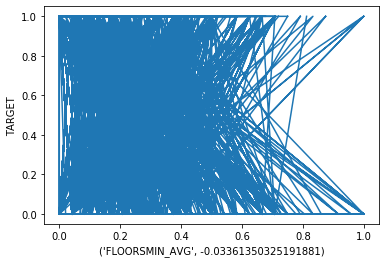

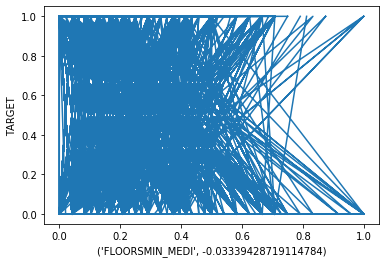

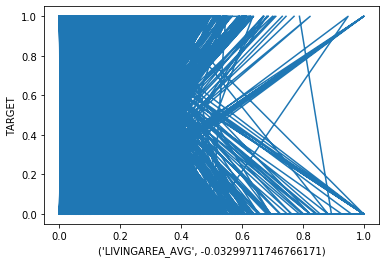

In [123]:
for s in sorted_list[:15]:
    plt.plot(app_train[s[0]], app_train.TARGET)
    plt.xlabel(s)
    plt.ylabel('TARGET')
    plt.show()
    

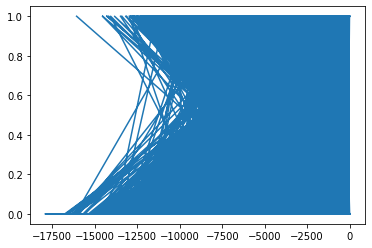

In [124]:
plt.plot(app_train['DAYS_EMPLOYED'], app_train.TARGET)
plt.show()

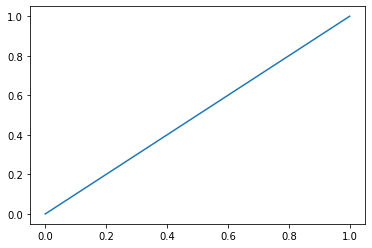

In [119]:
plt.plot(app_train.TARGET, app_train.TARGET)
plt.show()

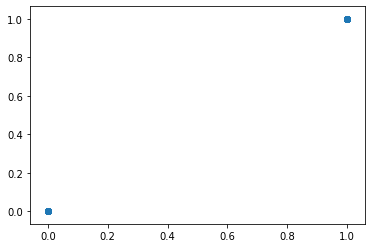

In [122]:
plt.scatter(app_train.TARGET, app_train.TARGET)

In [ ]:
import seaborn as sns
 
# with regression
sns.pairplot(sorted_list, kind="reg")